In [1]:
from IPython.display import Image

# Introduction to NetworkX - network analysis

Bay Area Python Interest Group (BayPIGgies) 10/24/2019<P>
Many of the examples from <a href="https://www.cl.cam.ac.uk/~cm542/teaching/2010/stna-pdfs/stna-lecture8.pdf">S. Scellato</a>, "NetworkX: Network Analysis with Python" 

# Introduction to NetworkX

Vast amounts of network data are being collected and generated
- biology: disease networks, gene networks, signaling pathway networks
- sociology: social networks, mobile phones
- tech: power grids, vehicular flows, data distribution 


NetworkX: “Python package for the creation, manipulation and study of the structure, dynamics and functions of complex networks.” 

<img src="https://networkx.github.io/documentation/networkx-1.5/_static/art1.png">

# What is NetworkX good for?  

- Very flexible graph implementations (node/graph can be anything!)
- Large set of native readable and writable formats
- Most of the core algorithms rely on extremely fast legacy code\
- Native python implementataion


# What is NetworkX NOT good for?

- Large-scale networks that require speed (entire fb/twitter social networks, for example)
- Better use of resources/threads than Python
- Extensive drawing of graphs: recommend Gephi, graphviz

As a side note, I personally have quite enjoyed <a href="https://gephi.org/">Gephi</a> and mostly have learned it through the tutorials that have been made publicly available by the author, Clement Levallois, but I have also found that some tips and tricks have only been seen in the <a href="https://www.facebook.com/groups/gephi/">Gephi facebook group</a>, so I would also recommend that new users to Gephi also join that community as well.

# Random graphs vs. scale-free networks

To construct a random graph, also known as Erdos Renyi graphs, first we generate disconnected nodes.  We connect these nodes using a uniform probability distribution. Many tendencies in the clustering tendency of graphs are connected to that graph's degree distribution.

When looking at graphs, it can be useful to characterize a given graph on how heterogeneous, random, and modular the graph is.  

<img src="https://noduslabs.com/wp-content/uploads/2012/04/Screen-Shot-2012-04-05-at-19.26.38-510x400.png">

Most real-world networks have degree distributions that follow the power law, and these networks are called scale-free networks.

<img src="http://www.network-science.org/fig_complex_networks_powerlaw_scalefree_node_degree_distribution_large.png">

In [2]:
import networkx as nx
from scipy.io import mmread
import networkx as nx
import numpy as np

# Getting started: Creating a new graph and adding nodes and edges 

One can pass any two objects to add_edge function to add edges between the two objects (nodes)

In [3]:
G = nx.Graph()
G.add_edge(1,2)
nx.draw_networkx(G)

/Users/lisabang/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


One can also pass in a range of nodes to add to the graph.

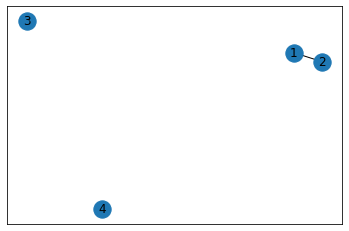

In [4]:
G.add_nodes_from([3, 4])
nx.draw_networkx(G)

The below commands add edges in two different ways; then we see how the adjacency list generation works

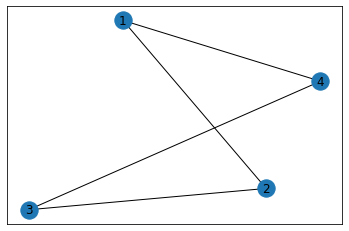

In [5]:
G.add_edge(3,4)
G.add_edges_from([(2, 3), (4, 1)])
nx.draw_networkx(G)

In [6]:
list(nx.generate_adjlist(G))

['1 2 4', '2 3', '3 4', '4']

# Graph generators for example data generation

NetworkX has some graph generators with example data, similar to scikit-learn.

In [7]:
# small famous graphs>>> 
petersen=nx.petersen_graph()


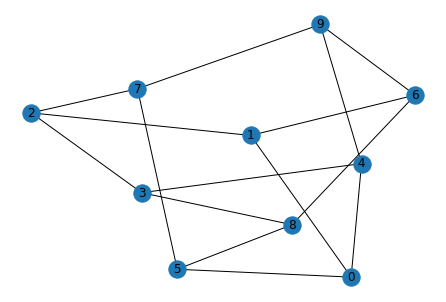

In [8]:
nx.draw(petersen, with_labels=True)

In [9]:

tutte=nx.tutte_graph()

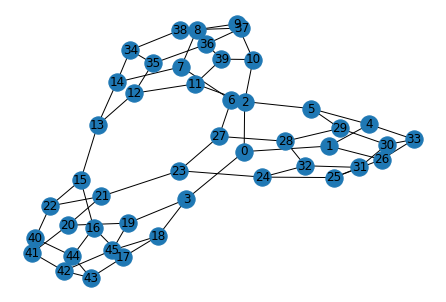

In [10]:
nx.draw(tutte, with_labels=True)

In [11]:

maze=nx.sedgewick_maze_graph()

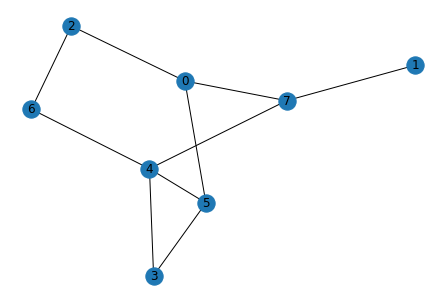

In [12]:
nx.draw(maze, with_labels=True)

In [13]:

tet=nx.tetrahedral_graph()

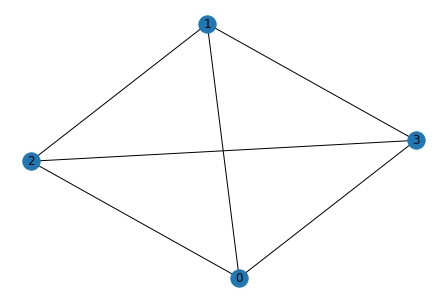

In [14]:
nx.draw(tet, with_labels=True)

In [15]:
# random graphs>>> 
er=nx.erdos_renyi_graph(100,0.15)
ws=nx.watts_strogatz_graph(100,3,0.1)
ba=nx.barabasi_albert_graph(100,5) 
red=nx.random_lobster(100,0.9,0.9)

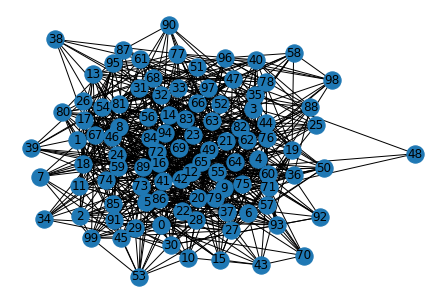

In [16]:
nx.draw(er, with_labels=True)

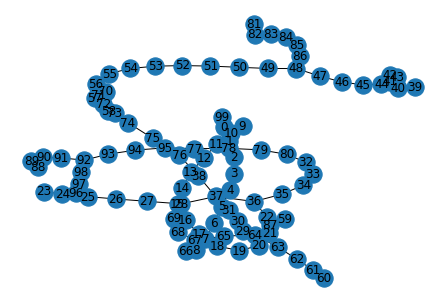

In [17]:
nx.draw_spring(ws, with_labels=True)

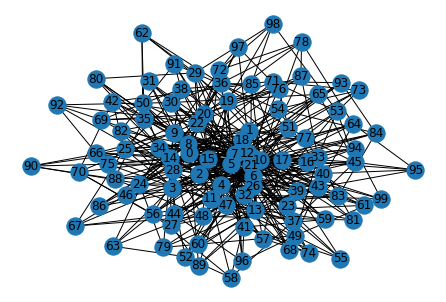

In [18]:
nx.draw(ba, with_labels=True)

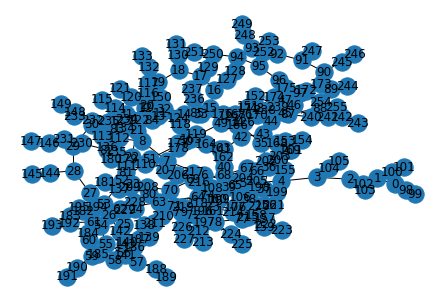

In [19]:
nx.draw(red, with_labels=True, nodesize=.5)

# Accessing nodes and edges

Any NetworkX graph behaves like a Python dictionary with nodes as primary keys. One can add a node using `add_node` but it is important to make sure that the node we are adding doesn't have the same key as an existing node

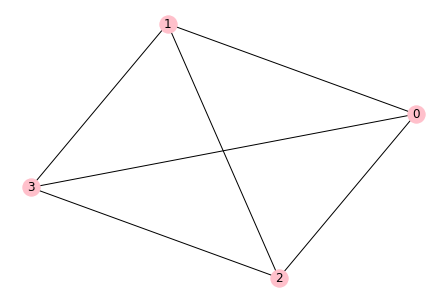

In [20]:
nx.draw(tet,with_labels=True,node_color="pink")

# Node entities

A node can be any hashable object such as strings, numbers, files, functions.  NetworkX supports <i>property graphs</i>, which allows graphs, vertices, and edges to have arbitrary key-value pairs implemented as a Python dictionary.

In [21]:
tet.add_node(5, time='5pm')


In [22]:
tet.node[5]['time']


'5pm'

Dictionary behavior of nodes:

In [23]:
tet.node[5] 

{'time': '5pm'}

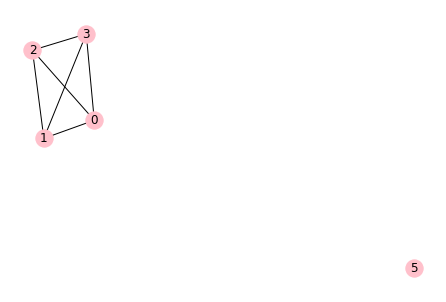

In [24]:
nx.draw(tet, with_labels=True,node_color="pink")

The edge attribute 'weight' should always be numeric and is useful for algorithms that require weighted edges.

In [25]:
tet.add_edge(3,5, weight=5.0)

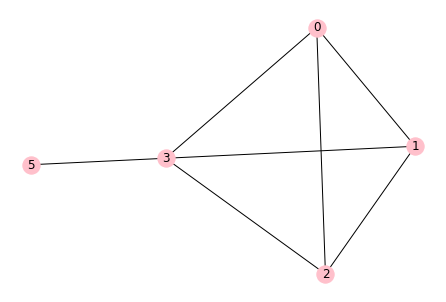

In [26]:
nx.draw(tet, with_labels=True,node_color="pink")

In [27]:
tet.remove_node(5)


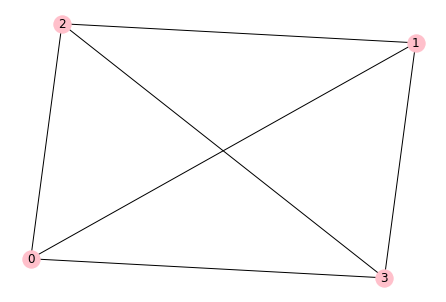

In [28]:
nx.draw(tet, with_labels=True,node_color="pink")

# Reading existing graph files and edge lists

NetworkX can read graphs from files and write to them using common graph formats:
- edge lists
- adjacency lists
- GML
- GEXF
- python pickle (marshal?)
- GraphML
- Pajek
- LEDA
- YAML

# Conversion of NIST MTX format to NetworkX readable format

In [29]:
import pandas as pd

In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
!ls *mtx

soc-dolphins.mtx


NIST market matrix format (*.mtx) is commonly used on NetworkRepository.org, a collection of Networks from different fields.  MTX format appears as follows. 

In [32]:
!head -10 soc-dolphins.mtx

%%MatrixMarket matrix coordinate pattern symmetric
%-------------------------------------------------------------------------------
% UF Sparse Matrix Collection, Tim Davis
% http://www.cise.ufl.edu/research/sparse/matrices/Newman/dolphins
% name: Newman/dolphins
% [social network of dolphins, Doubtful Sound, New Zealand]
% id: 2396
% date: 2003
% author: D. Lusseau
% ed: M. Newman


In [33]:
!tail -10 soc-dolphins.mtx

54 44
51 46
52 46
60 46
50 47
58 49
52 51
56 52
62 54
58 55


A useful one-liner is provided here to read MTX format into NetworkX. To summarize the following from SageMath, the solution involved reading the file into a Scipy sparse matrix, then converting to a dense matrix, then converting the matrix type to numpy, then using networkX to create the graph.  

In [34]:
g = nx.Graph(np.matrix(mmread('soc-dolphins.mtx').todense()))

In [35]:
g

In [36]:
nx.write_gml(g, "dolphins.gml")

In [37]:
!head dolphins.gml

graph [
  node [
    id 0
    label "0"
  ]
  node [
    id 1
    label "1"
  ]
  node [


# Basic network statistics

Number of nodes and edges are the two first network stats that come to mind.  On the Network repository site, number of nodes is 62.  Number of edges, 159.  This should be the same.

In [38]:
len(list(g.nodes))

62

In [39]:
len(list(g.edges))

159

We can calculate the average degree of the network by dividing the value of the size attribute of the graph (number of edges) by the value of the order attribute of the graph (number of nodes).

In [40]:
average_degree=g.size()/g.order()
average_degree

2.564516129032258

In [41]:
nx.average_node_connectivity(g)

3.0634584875727127

In [42]:
sum(list(nx.triangles(g).values()))/3

95.0

The number of triangles within the network is 95.

# Basic network analysis - degree distribution

For the degree distribution, we will use the example of a network of drug users in Hartford, CT, because this dataset is publically available and directed.

In [43]:
hartford = nx.read_edgelist('hartford_drug.txt',create_using=nx.DiGraph(),nodetype=int)

/Users/lisabang/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/lisabang/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


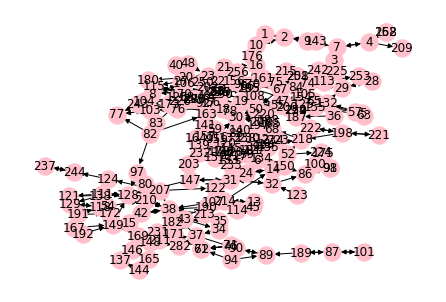

In [44]:
nx.draw(hartford, with_labels=True, node_color="pink", pos=nx.kamada_kawai_layout(hartford))

We can compute in- and out- degree distribution of the graph. 

In [45]:
in_degrees  = hartford.in_degree() # dictionary node:degree
in_values = sorted(set(dict(in_degrees).values()))
in_hist = [list(dict(in_degrees).values()).count(x) for x in in_values]

out_degrees  = hartford.out_degree() # dictionary node:degree
out_values = sorted(set(dict(out_degrees).values()))
out_hist = [list(dict(out_degrees).values()).count(x) for x in out_values]


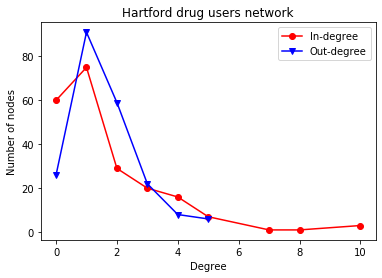

In [46]:
plt.figure()
plt.plot(in_values,in_hist,'ro-') # in-degree
plt.plot(out_values,out_hist,'bv-') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Hartford drug users network')
#plt.savefig('hartford_degree_distribution.pdf')
plt.show()

# Shortest path calculations

To get the shortest path between any two given nodes in the network, we'll use the dolphin dataset again.

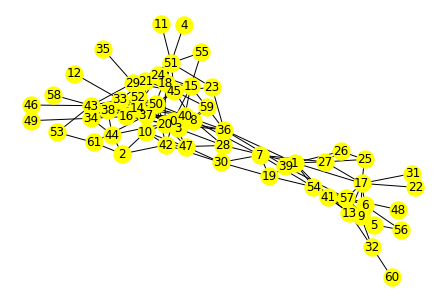

In [47]:
nx.draw(g, with_labels=True, node_color="yellow")

In [48]:
nx.shortest_path(g, 35,60)

[35, 29, 52, 40, 7, 54, 13, 32, 60]

One can create subnetworks of elements of graphs by instantiating "subgraph" attribute of the graph with the nodes that are to be included in the subgraph.

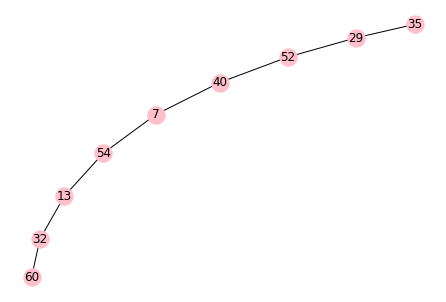

In [49]:
nx.draw(g.subgraph(nx.shortest_path(g, 35,60)), with_labels=True, node_color="pink")

In [51]:
nx.draw(hartford.subgraph(nx.shortest_path(hartford, 237,80)), with_labels=True, node_color="pink")

NetworkXNoPath: No path between 237 and 80.

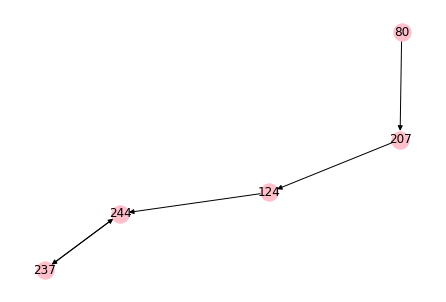

In [52]:
nx.draw(hartford.subgraph(nx.shortest_path(hartford, 80,237)), with_labels=True, node_color="pink")

# Graph operators

Classic graph operations 

`subgraph(G, nbunch)` - induce subgraph of G on nodes in nbunch<br>
`union(G1,G2)` - graph union <br>
`disjoint_union(G1,G2)` - graph union assuming all nodes are different <br>
`cartesian_product(G1,G2)` - return Cartesian product graph <br>
`compose(G1,G2)` - combine graphs identifying nodes common to both <br>
`complement(G)` - graph complement <br>
`create_empty_copy(G)` - return an empty copy of the same graph class <br>
`convert_to_undirected(G)` - return an undirected representation of G <br>
`convert_to_directed(G)` - return a directed representation of G

# PageRank calculation:

Because of the way the PageRank algorithm is set up, the input network needs to be a directed network. Therefore the NetworkX PageRank requires a directed network.  If one passes in an undirected network to PageRank, NetworkX actually takes each undirected edge and considers that two edges in both directions (A to B, B to A). We will take a look at its performance on a directed network, the Hartford network.

In [53]:
nx.pagerank(hartford, alpha=0.85)

{1: 0.01804079227833973,
 2: 0.01869372965573178,
 10: 0.01883711248531538,
 3: 0.004914302589453852,
 7: 0.008555168341085533,
 4: 0.005379522193604889,
 209: 0.003380961956150279,
 5: 0.0010946230419637015,
 132: 0.00696228274220213,
 6: 0.0020250622502657753,
 150: 0.004782497076791007,
 9: 0.003518643777000741,
 8: 0.003357369847717152,
 106: 0.006044565271479669,
 115: 0.004377185813888578,
 11: 0.0010946230419637015,
 133: 0.0015598426461147384,
 218: 0.00792948721977808,
 12: 0.0010946230419637015,
 88: 0.002955501458567849,
 13: 0.0016198208495653201,
 214: 0.0024714873458629616,
 14: 0.0028228971031550765,
 24: 0.004246003726261,
 52: 0.0022943845541741653,
 16: 0.002826499525384728,
 19: 0.013661918582500612,
 17: 0.0010946230419637015,
 64: 0.00946728779049618,
 78: 0.0015598426461147384,
 18: 0.013172824129349666,
 55: 0.008623530706873935,
 103: 0.018029993116827896,
 163: 0.009428767015719973,
 20: 0.0035409594536429676,
 180: 0.003774302380995258,
 21: 0.0040748949840379

We set the PageRank of each node as a node attribute.  The dictionary format makes it easy:

In [54]:
pr = nx.pagerank(hartford, alpha=0.85)
nx.set_node_attributes(hartford, pr, 'pagerank')

In [55]:
hartford.node[237]

{'pagerank': 0.014571758082425295}

# Interactive plotting with Plot.ly

In [56]:


import plotly.graph_objs as go



In [57]:
import chart_studio.plotly as py

In [58]:
pos = nx.kamada_kawai_layout(hartford)
nx.set_node_attributes(hartford, pos, 'pos')
#nx.get_node_attributes(g, "pos")

In [59]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

In [60]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in hartford.edges():
    x0, y0 = hartford.node[edge[0]]['pos']
    x1, y1 = hartford.node[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [61]:
for node in hartford.nodes():
    x, y = hartford.node[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

In [62]:
for node, adjacencies in enumerate(hartford.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = '# of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

In [63]:
import chart_studio

In [64]:
#enter your own plotly username and api key here
chart_studio.tools.set_credentials_file(username="", api_key="")

In [ ]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph of Hartford Drug Users in Plot.ly',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="reference: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=True,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

py.iplot(fig, filename='networkx')


# Applications for larger networks:

<a href="http://hdpm.biomedinfolab.com/">Human Disease Phenotype Map</a> from Geisinger Health System -- journal reference from American Journal of Human Genetics <a href="https://www.cell.com/ajhg/pdfExtended/S0002-9297(18)30409-9">here</a>.